In [ ]:
import matplotlib.pyplot as plt

# Clustering for Dataset Exploration

**How many clusters?**

You are given an array points of size 300x2, where each row gives the (x, y) co-ordinates of a point on a map. Make a scatter plot of these points, and use the scatter plot to guess how many clusters there are.

matplotlib.pyplot has already been imported as plt. In the IPython Shell:

Create an array called xs that contains the values of points[:,0] - that is, column 0 of points.
Create an array called ys that contains the values of points[:,1] - that is, column 1 of points.
Make a scatter plot by passing xs and ys to the plt.scatter() function.
Call the plt.show() function to show your plot.
How many clusters do you see?n

In [1]:
ys=points[:,1]

In [ ]:
xs=points[:,0]

In [ ]:
plt.scatter(xs,ys)

In [ ]:
plt.show()

**Clustering 2D points**

From the scatter plot of the previous exercise, you saw that the points seem to separate into 3 clusters. You'll now create a KMeans model to find 3 clusters, and fit it to the data points from the previous exercise. After the model has been fit, you'll obtain the cluster labels for some new points using the .predict() method.

You are given the array points from the previous exercise, and also an array new_points.

In [ ]:
# Import KMeans
from sklearn.cluster import KMeans 

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)

**Inspect your clustering**

Let's now inspect the clustering you performed in the previous exercise!

A solution to the previous exercise has already run, so new_points is an array of points and labels is the array of their cluster labels.

In [ ]:
# Import pyplot
import matplotlib.pyplot as plt

# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels,alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
"""
scatter plot of centroids_x and centroids_y, using 'D' (a diamond) as a marker by specifying the marker parameter. Set the size of the markers to be 50 using s=50.
"""
plt.scatter(centroids_x,centroids_y,marker="D",s=50)
plt.show()


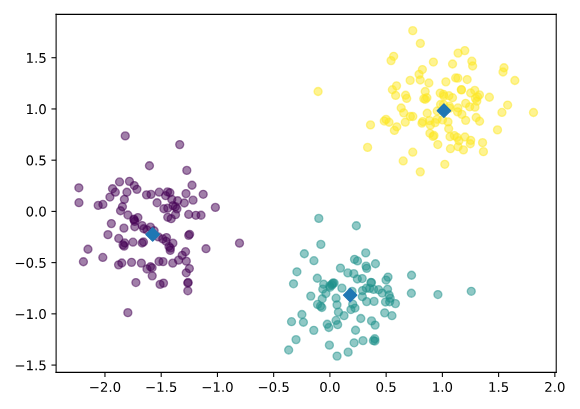

**How many clusters of grain?**

In the video, you learned how to choose a good number of clusters for a dataset using the k-means inertia graph. You are given an array samples containing the measurements (such as area, perimeter, length, and several others) of samples of grain. What's a good number of clusters in this case?

KMeans and PyPlot (plt) have already been imported for you.

In [8]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
semillas=pd.read_csv("./dataset/Grains/seeds.csv")
semillas.head()

,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


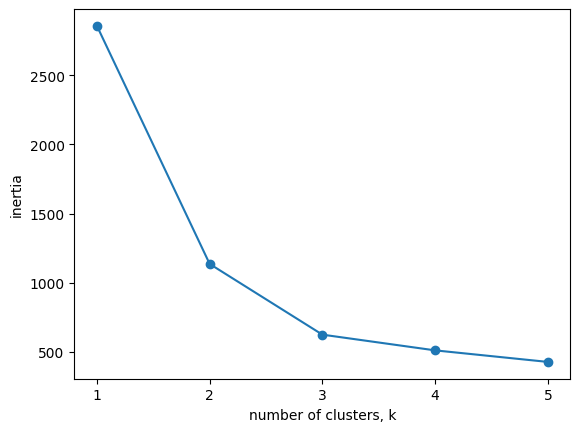

In [5]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(semillas)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [6]:
semillas.head()

,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
0,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
1,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
2,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
3,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
4,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1


**Evaluating the grain clustering**

In the previous exercise, you observed from the inertia plot that 3 is a good number of clusters for the grain data. In fact, the grain samples come from a mix of 3 different grain varieties: "Kama", "Rosa" and "Canadian". In this exercise, cluster the grain samples into three clusters, and compare the clusters to the grain varieties using a cross-tabulation.

You have the array samples of grain samples, and a list varieties giving the grain variety for each sample. Pandas (pd) and KMeans have already been imported for you.

In [3]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)
# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(semillas)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)


NameError: name 'semillas' is not defined

**Scaling fish data for clustering**

You are given an array samples giving measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. In order to cluster this data effectively, you'll need to standardize these features first. In this exercise, you'll build a pipeline to standardize and cluster the data.

In [4]:
import pandas as pd
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
pescados=pd.read_csv("./dataset/fish.csv")

In [7]:
species=pescados.iloc[:,0]
species

0     Bream
1     Bream
2     Bream
3     Bream
4     Bream
      ...  
79     Pike
80     Pike
81     Pike
82     Pike
83     Pike
Name: Bream, Length: 84, dtype: object

In [64]:
# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)

# Fit the pipeline to samples
pipeline.fit(pescados.iloc[:,1:])

# Calculate the cluster labels: labels
labels = pipeline.predict(pescados.iloc[:,1:])



In [67]:
# Crear el DataFrame con columnas 'labels' y 'species'
df = pd.DataFrame({'labels': labels, 'species': species})
df.head()

,labels,species
0,0,Bream
1,0,Bream
2,0,Bream
3,0,Bream
4,0,Bream


In [68]:
# Create crosstab: ct
ct = pd.crosstab(df["labels"],df["species"])

# Display ct
print(ct)

species  Bream  Pike  Roach  Smelt
labels                            
0           33     0      3      0
1            0     0     17     14
2            0     5      0      0
3            0    12      0      0


**Clustering stocks using KMeans**

In this exercise, you'll cluster companies using their daily stock price movements (i.e. the dollar difference between the closing and opening prices for each trading day). You are given a NumPy array movements of daily price movements from 2010 to 2015 (obtained from Yahoo! Finance), where each row corresponds to a company, and each column corresponds to a trading day.

Some stocks are more expensive than others. To account for this, include a Normalizer at the beginning of your pipeline. The Normalizer will separately transform each company's stock price to a relative scale before the clustering begins.

Note that Normalizer() is different to StandardScaler(), which you used in the previous exercise. While StandardScaler() standardizes features (such as the features of the fish data from the previous exercise) by removing the mean and scaling to unit variance, Normalizer() rescales each sample - here, each company's stock price - independently of the other.

In [1]:
import pandas as pd
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

In [2]:
movements=pd.read_csv("./dataset/company-stock-movements-2010-2015-incl.csv")
companies=movements.iloc[:,0].copy()
movements.head()

,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


In [8]:
# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements.iloc[:,1:])


Pipeline(steps=[('normalizer', Normalizer()),
                ('kmeans', KMeans(n_clusters=10))])

In [11]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements.iloc[:,1:])

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})

# Display df sorted by cluster label
print(df.sort_values(by="labels"))


    labels                           companies
58       0                               Xerox
16       1                   General Electrics
45       1                                Sony
37       2                            Novartis
19       2                     GlaxoSmithKline
42       2                   Royal Dutch Shell
52       2                            Unilever
6        2            British American Tobacco
46       2                      Sanofi-Aventis
49       2                               Total
39       2                              Pfizer
44       3                        Schlumberger
35       3                            Navistar
12       3                             Chevron
10       3                      ConocoPhillips
8        3                         Caterpillar
53       3                       Valero Energy
57       3                               Exxon
9        4                   Colgate-Palmolive
28       4                           Coca Cola
56       4   

# Visualization with Hierarchical Clustering and t-SNE

**Hierarchical clustering of the grain data**

In the video, you learned that the SciPy linkage() function performs hierarchical clustering on an array of samples. Use the linkage() function to obtain a hierarchical clustering of the grain samples, and use dendrogram() to visualize the result. A sample of the grain measurements is provided in the array samples, while the variety of each grain sample is given by the list varieties.

In [11]:
samples=pd.read_csv("./dataset/fish.csv")
varieties=samples.iloc[:,0]

In [12]:
# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples.iloc[:,1:],method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


KeyError: -51

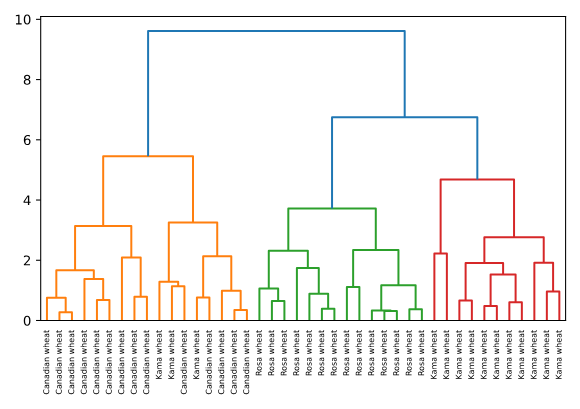

**Hierarchies of stocks**

In chapter 1, you used k-means clustering to cluster companies according to their stock price movements. Now, you'll perform hierarchical clustering of the companies. You are given a NumPy array of price movements movements, where the rows correspond to companies, and a list of the company names companies. SciPy hierarchical clustering doesn't fit into a sklearn pipeline, so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer.

linkage and dendrogram have already been imported from scipy.cluster.hierarchy, and PyPlot has been imported as plt.

In [13]:
import pandas as pd 
# Import normalize
from sklearn.preprocessing import normalize# vamos a utilizar normalize en vez de Normalizer


In [14]:
df=pd.read_csv("./dataset/company-stock-movements-2010-2015-incl.csv")
companies=df.iloc[:,0].copy()
movements=df.iloc[:,1:].copy()

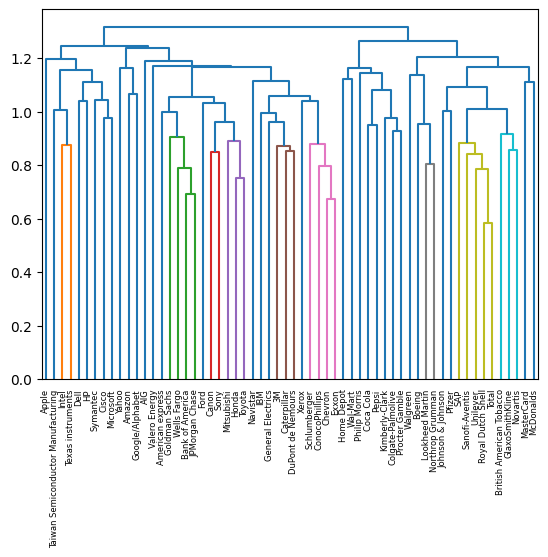

In [16]:
# Normalizar los movimientos
normalized_movements = normalize(movements)

# Calcular el enlace
mergings = linkage(normalized_movements, method='complete')

# Convertir companies a lista
companies_list = companies.tolist()

# Graficar el dendrograma
dendrogram(mergings,
           labels=companies_list,
           leaf_rotation=90,
           leaf_font_size=6,
)

# Mostrar el gráfico
plt.show()


## Cluster labels in hierarchical clustering

**Different linkage, different hierarchical clustering!**

In the video, you saw a hierarchical clustering of the voting countries at the Eurovision song contest using 'complete' linkage. Now, perform a hierarchical clustering of the voting countries with 'single' linkage, and compare the resulting dendrogram with the one in the video. Different linkage, different hierarchical clustering!

You are given an array samples. Each row corresponds to a voting country, and each column corresponds to a performance that was voted for. The list country_names gives the name of each voting country. This dataset was obtained from Eurovision.

In [1]:
# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd

In [17]:
df=pd.read_csv("./dataset/fish.csv")
samples=df.iloc[:,1:]
fish_names=df.iloc[:,0]
# Convertir companies a lista
fish_names_list = fish_names.tolist()

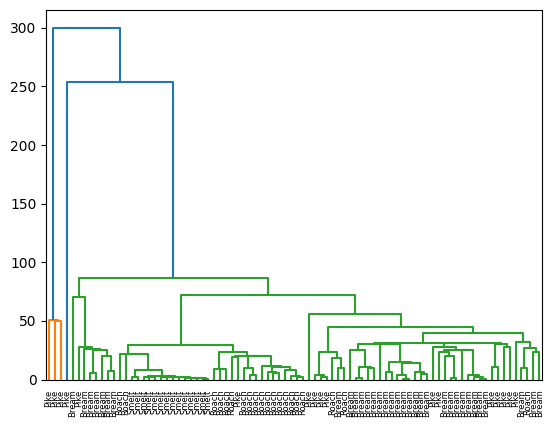

In [18]:
# Calculate the linkage: mergings
mergings = linkage(samples,method='single')

# Plot the dendrogram
dendrogram(mergings,labels=fish_names_list,leaf_rotation=90,leaf_font_size=6)
plt.show()


**Extracting the cluster labels**

In the previous exercise, you saw that the intermediate clustering of the grain samples at height 6 has 3 clusters. Now, use the fcluster() function to extract the cluster labels for this intermediate clustering, and compare the labels with the grain varieties using a cross-tabulation.

The hierarchical clustering has already been performed and mergings is the result of the linkage() function. The list varieties gives the variety of each grain sample.

In [20]:
# Perform the necessary imports
import pandas as pd
from scipy.cluster.hierarchy import fcluster

In [21]:

# Use fcluster to extract labels: labels
#the second argumen of fclusters is the maximum height 
labels = fcluster(mergings,6,criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': fish_names_list})

# Create crosstab: ct
ct = pd.crosstab(df['labels'],df['varieties'])

# Display ct
print(ct)



varieties  Bream  Pike  Roach  Smelt
labels                              
1              0     1      0      0
2              0     1      0      0
3              0     1      0      0
4              2     0      0      0
5              1     0      0      0
6              1     0      0      0
7              1     0      0      0
8              1     0      0      0
9              0     1      0      0
10             1     0      0      0
11             0     0      0      2
12             0     0      0     12
13             0     0      1      0
14             0     0      1      0
15             0     0      1      0
16             0     0      1      0
17             0     0      1      0
18             0     0      1      0
19             0     1      0      0
20             0     0      2      0
21             0     0      1      0
22             0     0      2      0
23             0     0      1      0
24             0     0      3      0
25             0     0      1      0
2

## t-SNE for 2 dimensional maps

**t-SNE visualization of grain dataset**

In the video, you saw t-SNE applied to the iris dataset. In this exercise, you'll apply t-SNE to the grain samples data and inspect the resulting t-SNE features using a scatter plot. You are given an array samples of grain samples and a list variety_numbers giving the variety number of each grain sample.

In [31]:
import pandas as pd
# Import TSNE
from sklearn.manifold import TSNE


In [32]:
df=pd.read_csv("./dataset/Grains/seeds.csv")
samples=df.iloc[:,:-1].copy()
variety=df.iloc[:,-1].copy().to_list()

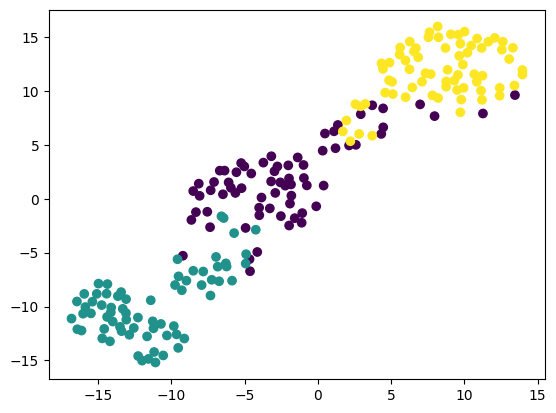

In [29]:
# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(samples)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=variety)
plt.show()


**A t-SNE map of the stock market**

t-SNE provides great visualizations when the individual samples can be labeled. In this exercise, you'll apply t-SNE to the company stock price data. A scatter plot of the resulting t-SNE features, labeled by the company names, gives you a map of the stock market! The stock price movements for each company are available as the array normalized_movements (these have already been normalized for you). The list companies gives the name of each company. PyPlot (plt) has been imported for you.

In [35]:
import pandas as pd 
# Import normalize
from sklearn.preprocessing import normalize# vamos a utilizar normalize en vez de Normalizer
# Import TSNE
from sklearn.manifold import TSNE


In [36]:
df=pd.read_csv("./dataset/company-stock-movements-2010-2015-incl.csv")
companies=df.iloc[:,0].copy()
movements=df.iloc[:,1:].copy()
# Normalizar los movimientos
normalized_movements = normalize(movements)

# Calcular el enlace
mergings = linkage(normalized_movements, method='complete')

# Convertir companies a lista
companies_list = companies.tolist()

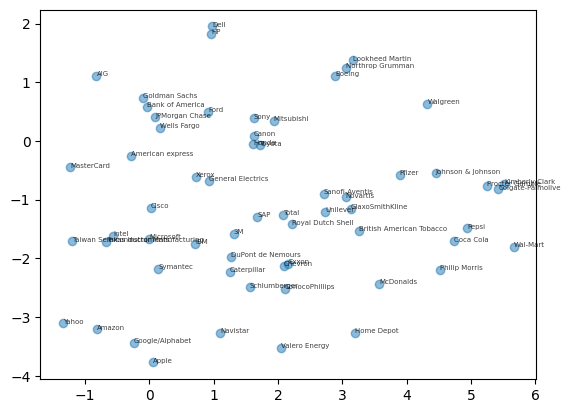

In [37]:
# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys,alpha=0.5)

# Annotate the points
#Code to label each point with its company name has been written for you using plt.annotate(), so just hit submit to see the visualization!
for x, y, company in zip(xs, ys, companies_list):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()


# Decorrelating Your Data and Dimension Reduction

# Discovering Interpretable Features